In [1]:
import os

os.chdir("../../../")  # Ensure Current working directory is top level folder where venv is.

import os.path
import math

import numpy as np
import matplotlib.pyplot as plt

from source.models.resonator_measurement.measurement_header import ResonatorMeasurementHeader
from source.models.resonator_measurement.sweep_data import SweepData
from source.services import npz_load_service
from source.util import continuous_sweep_data_tools
from source.util import segmented_sweep_data_tools


from source.models.hidfmux.hidfmux_timestream import TimestreamData
from source.services.hidfmux_pkl_file_load_service import HidfmuxFileLoadService
from source.models.hidfmux.hidfmux_multi_sweep import HidfmuxMultiSweep
from source.util import noise_multiplication_method_tools
from source.models.noise.noise_sweep import NoiseSweep
from source.models.hidfmux.hidfmux_timestream import HidfmuxTimestream
from source.models.resonator_measurement.measurement_header import ResonatorMeasurementHeader
from source.util import hidfmux_data_tools 
from source.util import hidfmux_transfer_functions#
from netCDF4 import Dataset

from scipy.interpolate import CubicSpline



In [2]:
vna_sweep_directory = r"/export/samba/Data/spt-slim/slim_simple_optical_v1_ft130a/240508/vna_sweeps"
continuous_sweep_file_name = "continuous_2.500GHz_to_3.200GHz_23mK_20.0dB_0.npz"

continuous_sweep_path = os.path.join(vna_sweep_directory, continuous_sweep_file_name)

continuous_sweep_data = npz_load_service.load_continuous_sweep(continuous_sweep_path)

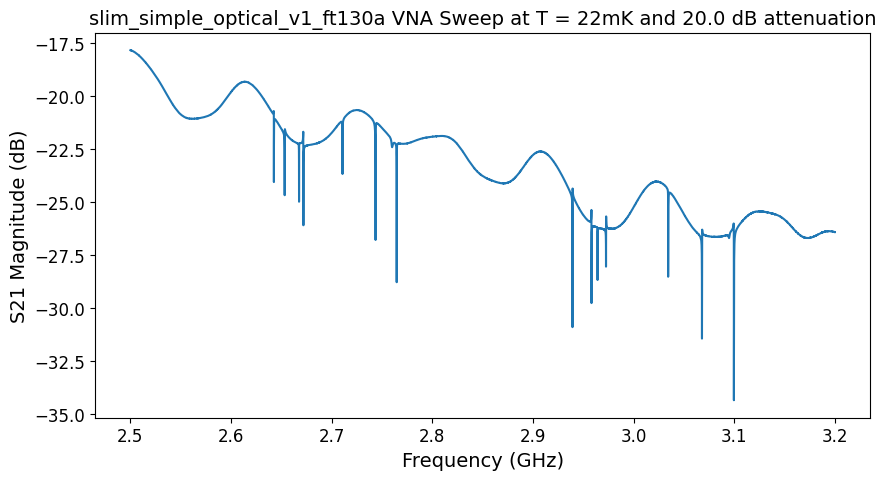

In [3]:
continuous_sweep_data_tools.plot_sweep(sweep_data=continuous_sweep_data, save_figure=False)

In [4]:
ppc_segmented_sweep_file_name = "PPC/segmented_22mK_4.0dB_0.npz"
ppc_segmented_sweep_path = os.path.join(vna_sweep_directory, ppc_segmented_sweep_file_name)
ppc_tone_names, ppc_tone_frequencies, ppc_segmented_sweep_data = npz_load_service.load_segmented_sweep(ppc_segmented_sweep_path)

In [5]:
(
    ppc_f0_array, ppc_qr_array, ppc_qc_array, ppc_qi_array
) = segmented_sweep_data_tools.plot_and_fit_segmented_sweep(
    tone_names_array=ppc_tone_names, sweep_data=ppc_segmented_sweep_data, save_figure=True
)
plt.show()

In [6]:
idc_segmented_sweep_file_name = "IDC/segmented_22mK_16.0dB_0.npz"
idc_segmented_sweep_path = os.path.join(vna_sweep_directory, idc_segmented_sweep_file_name)
idc_tone_names, idc_tone_frequencies, idc_segmented_sweep_data = npz_load_service.load_segmented_sweep(idc_segmented_sweep_path)

In [7]:
(
    idc_f0_array, idc_qr_array, idc_qc_array, idc_qi_array
) = segmented_sweep_data_tools.plot_and_fit_segmented_sweep(
    tone_names_array=idc_tone_names, sweep_data=idc_segmented_sweep_data, save_figure=True
)
plt.show()

In [8]:
segmented_sweep_data_tools.plot_q_histogram(
    measurement_header=ppc_segmented_sweep_data.measurement_header,
    qr_array=ppc_qr_array,
    qc_array=ppc_qc_array,
    qi_array=ppc_qi_array,
    n_bins=20,
    title=f"PPC Q factor histograms for {ppc_segmented_sweep_data.measurement_header.dut} at T={int(ppc_segmented_sweep_data.measurement_header.actual_temperature * 1000)}mK, {ppc_segmented_sweep_data.measurement_header.power}dB"
    )
plt.show()

Mean Qr: 4.18E+04
Mean Qc: 1.06E+05
Mean Qi: 7.53E+04
Data points removed by mask: 0


In [9]:
segmented_sweep_data_tools.plot_q_histogram(
    measurement_header=ppc_segmented_sweep_data.measurement_header,
    qr_array=idc_qr_array,
    qc_array=idc_qc_array,
    qi_array=idc_qi_array,
    n_bins=20,
    title=f"IDC Q factor histograms for {ppc_segmented_sweep_data.measurement_header.dut} at T={int(ppc_segmented_sweep_data.measurement_header.actual_temperature * 1000)}mK, {ppc_segmented_sweep_data.measurement_header.power}dB"
    )
plt.show()

Mean Qr: 1.99E+04
Mean Qc: 5.17E+04
Mean Qi: 4.65E+04
Data points removed by mask: 0


In [10]:

# Plot Qc vs frequency:

plt.figure(figsize=(8, 6))
plt.plot(ppc_f0_array * 1e-9, ppc_qc_array, linestyle="none", marker="o", markersize="6", label="PPC Qc")
plt.plot(ppc_f0_array * 1e-9, ppc_qr_array, linestyle="none", marker="o", markersize="6", label="PPC Qr")
plt.plot(idc_f0_array * 1e-9, idc_qc_array, linestyle="none", marker="s", markersize="6", label="IDC Qc")
plt.plot(idc_f0_array * 1e-9, idc_qr_array, linestyle="none", marker="s", markersize="6", label="IDC Qr")
plt.xlabel("F$_0$ (GHz)")
plt.ylabel("Q")
plt.yscale("log")
plt.legend()
plt.show()

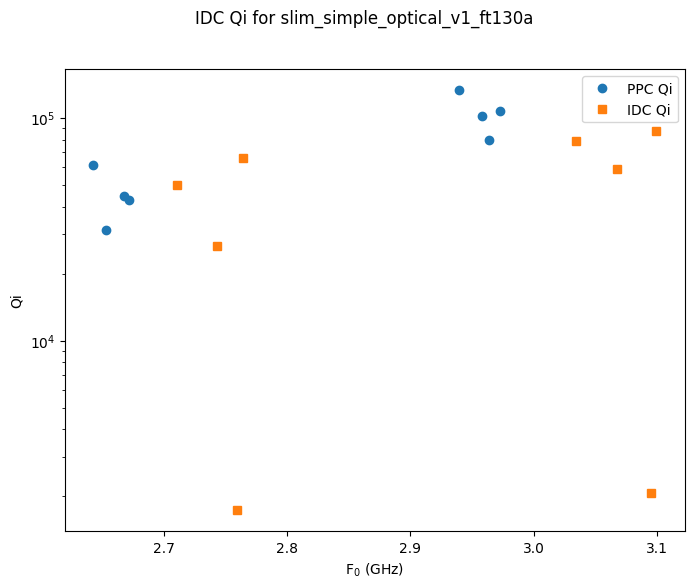

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(ppc_f0_array * 1e-9, ppc_qi_array, linestyle="none", marker="o", markersize="6", label="PPC Qi")
plt.plot(idc_f0_array * 1e-9, idc_qi_array, linestyle="none", marker="s", markersize="6", label="IDC Qi")
plt.xlabel("F$_0$ (GHz)")
plt.ylabel("Qi")
plt.yscale("log")
plt.legend()
plt.suptitle(f"IDC Qi for {ppc_segmented_sweep_data.measurement_header.dut}")
plt.show()